### ***`Importing All Modules and Methods that we will use`***

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler  , PolynomialFeatures # Ensure PolynomialFeatures is here
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import  Pipeline
from scipy.stats import uniform , randint
from xgboost import XGBRegressor
import joblib


from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error , r2_score , f1_score , precision_score , accuracy_score , mean_squared_error
           
from datetime import date
from used_Mehods import Date_Calculation

### ***`Data Read & Data Show`***

In [40]:
data = pd.read_csv('../DataSet/dataset_file.csv' , sep=',')
print(data.head())

         Date Time of Day      Category   Platform Service Type Customer Type  \
0  2024-10-29       Night  Subscription  Instagram      Haircut     Returning   
1  2024-09-25       Night       Service      Email        Bread     Returning   
2  2024-10-05       Night       Service   In-store       Coffee           New   
3  2024-07-15     Morning  Subscription  Instagram     Plumbing     Returning   
4  2024-12-25     Morning       Service   In-store      Haircut     Returning   

   Ad Spend  Conversions  Daily Revenue  
0     94.34            5         366.74  
1     56.36            4         492.62  
2     92.64            0         330.15  
3     90.13            3          99.41  
4     73.70            2         203.81  


### ***`Data Information like columns names and its datatypes`***

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2005 non-null   object 
 1   Time of Day    2003 non-null   object 
 2   Category       2003 non-null   object 
 3   Platform       2000 non-null   object 
 4   Service Type   1999 non-null   object 
 5   Customer Type  2000 non-null   object 
 6   Ad Spend       2002 non-null   float64
 7   Conversions    2005 non-null   int64  
 8   Daily Revenue  2005 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 141.1+ KB


### ***`Data Checking Null Values`*** 

In [42]:
print(data.isnull().sum())

Date             0
Time of Day      2
Category         2
Platform         5
Service Type     6
Customer Type    5
Ad Spend         3
Conversions      0
Daily Revenue    0
dtype: int64


In [43]:
data.dropna(inplace=True)

In [44]:
###                ***Important Step***
# convert the date values to period as we will compute the period that the last coefficiently <br>
# as this helps us to detect which causes the clients to reduce treating with the company<br>
# which helps us to make strategies to increase the number of clients , and increase the<br>
# duration of their treatment with the company as this increases the revenues

`# *The code below used to aggregate financial data and print summaries of the results. It calculates the total daily revenue for each product category present in a DataFrame named data.*`

---

In [45]:
data_revenue_by_category = data.groupby(['Date' , 'Category'])['Daily Revenue'].sum().reset_index()
print(f'The Unique Values in Category are : {data['Category'].unique()} ' , end=f'\n{'*'*50}\n')

print(f'\n{'*'*50} As an Showing For Data After Grouping :- ')

print(f'\n{"-"* 50}\n {data_revenue_by_category.head(20)}' , end=f'\n{"-"*50}\n')


The Unique Values in Category are : ['Subscription' 'Service' 'Product'] 
**************************************************

************************************************** As an Showing For Data After Grouping :- 

--------------------------------------------------
           Date      Category  Daily Revenue
0   2024-05-02       Product          32.88
1   2024-05-02       Service         873.96
2   2024-05-03       Product         462.69
3   2024-05-03       Service         334.41
4   2024-05-03  Subscription         706.55
5   2024-05-04       Product         911.29
6   2024-05-04       Service         496.54
7   2024-05-04  Subscription         346.70
8   2024-05-05       Product         239.85
9   2024-05-05       Service        1436.10
10  2024-05-05  Subscription         464.40
11  2024-05-06       Product         244.91
12  2024-05-06       Service         331.02
13  2024-05-06  Subscription         945.93
14  2024-05-07       Product         606.59
15  2024-05-07       Ser

In [46]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by=['Date'] )

data["Date_Of_Day"] = data['Date'].dt.day   # extract the weekends
data["Month_Number"] = data['Date'].dt.month   # extract the weekends
data["Year_Number"] = data['Date'].dt.year   # extract the weekends
data["DayOfWeek_number"] = data['Date'].dt.dayofweek   # extract the weekends

data['Date'] = data['Date'].dt.date
data['Last_treatment_Period_In_Years'] = data['Date'].apply(Date_Calculation)  # 2.57

data["Revenue Change"]  = data['Daily Revenue'].diff()    # here we will now if the daily revenue in that day greater than in the last day
data["Ad_to_Revenue_Ratio"] =  data["Ad Spend"] / (data["Daily Revenue"] + 1) # here we will show of the ad_spend  has an effect on the daily revenue or not
data.dropna(inplace=True)

In [47]:
data.drop(columns=['Date'] , inplace = True , errors='ignore') # Removed index=1 to avoid errors if dataframe is small

### ***`Data Visalization Steps used for show relationships between columns and Target`***

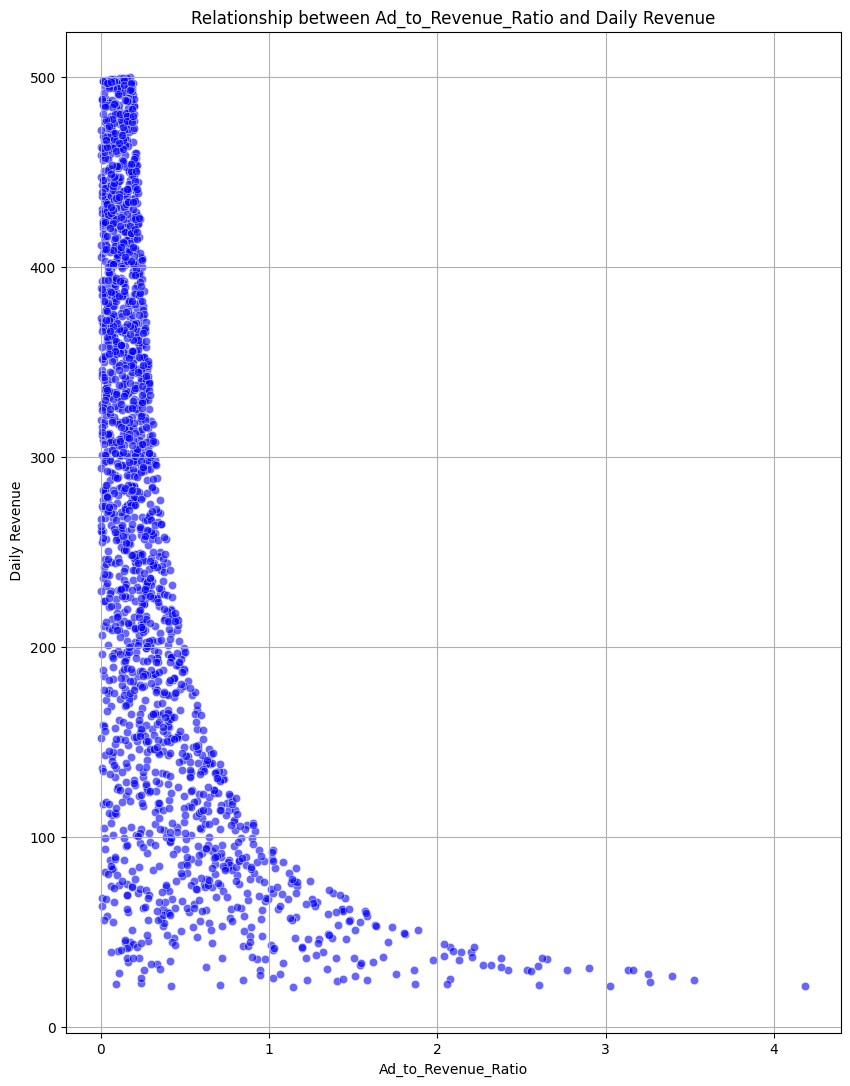

In [48]:
plt.figure(figsize = (10 , 13))
sns.scatterplot(x = 'Ad_to_Revenue_Ratio' ,  y ="Daily Revenue" ,  data=data  , color='blue' ,  alpha= 0.6)
plt.title('Relationship between Ad_to_Revenue_Ratio and Daily Revenue')
plt.xlabel('Ad_to_Revenue_Ratio')
plt.ylabel(' Daily Revenue')
plt.grid(True)
plt.savefig('advertisement_spend_effect_daily_revenue_chart.png' , dpi = 300 )
plt.show()


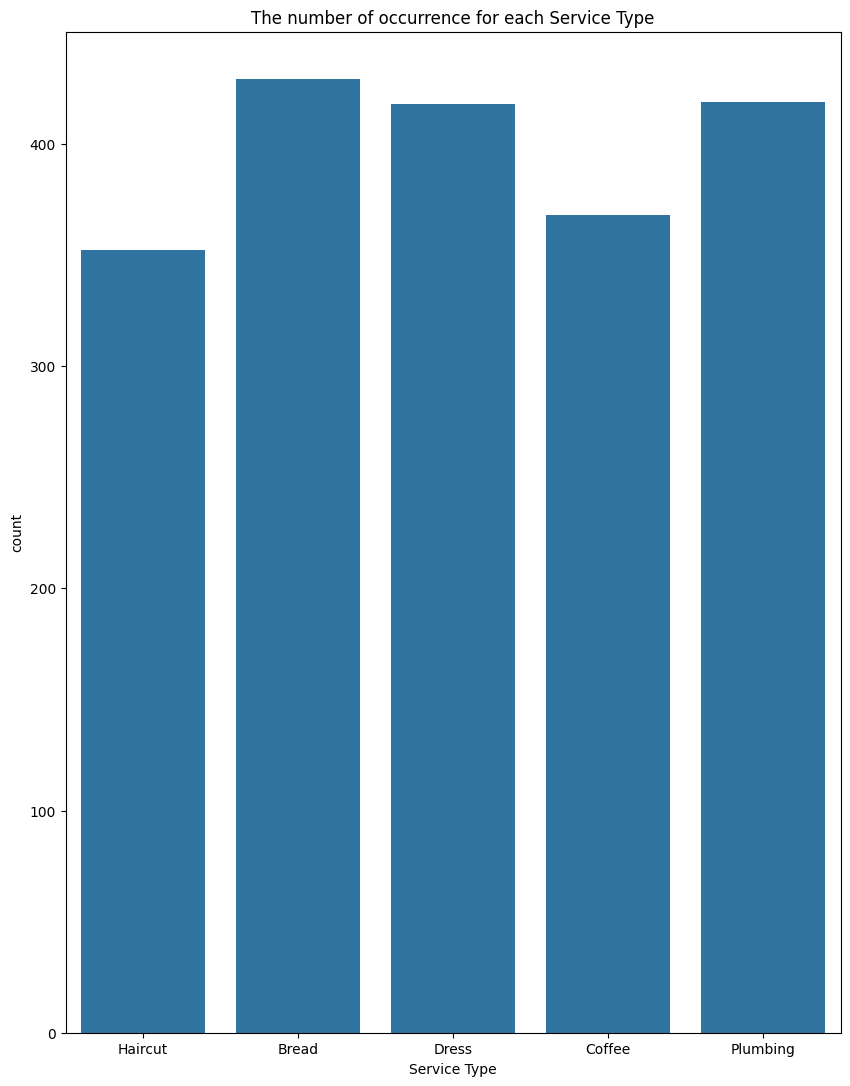

In [49]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Service Type')
plt.title('The number of occurrence for each Service Type')
plt.xlabel('Service Type')
plt.savefig('service_type_chart.png' , dpi = 300 )
plt.show()

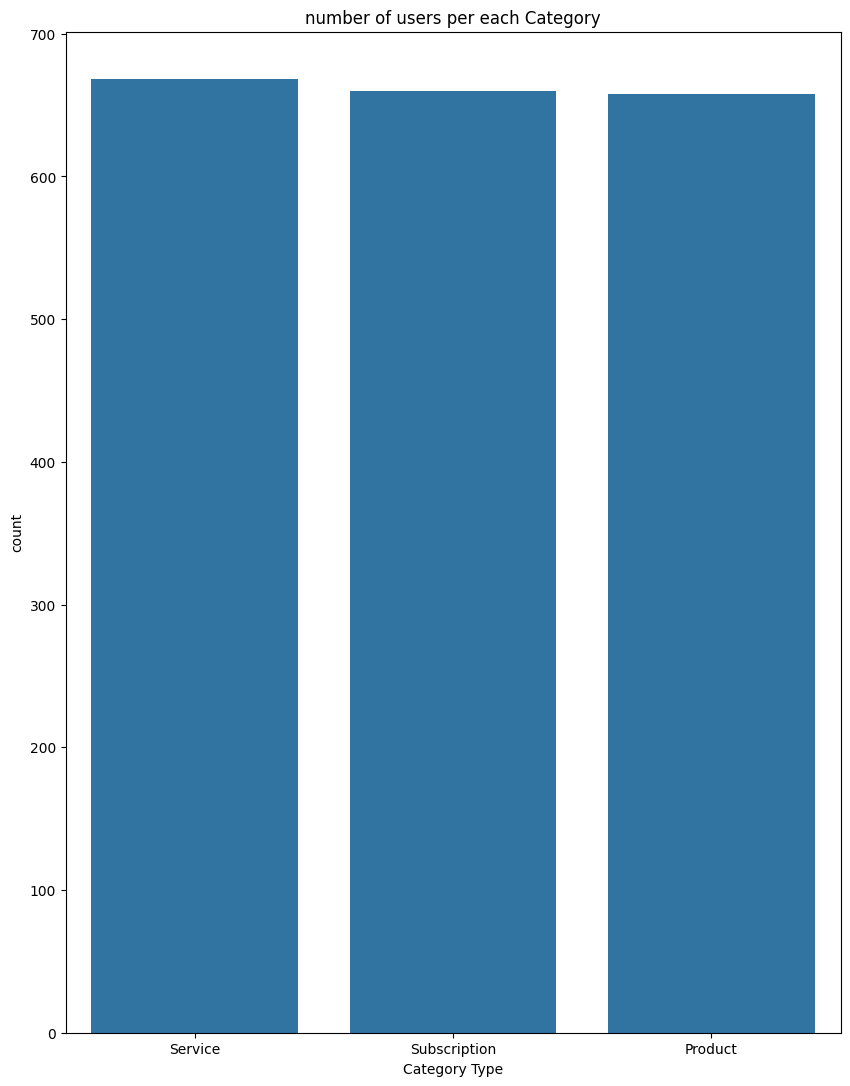

In [50]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Category')
plt.title('number of users per each Category')
plt.xlabel('Category Type')
plt.savefig('Category_type_chart.png' , dpi = 300 )
plt.show()

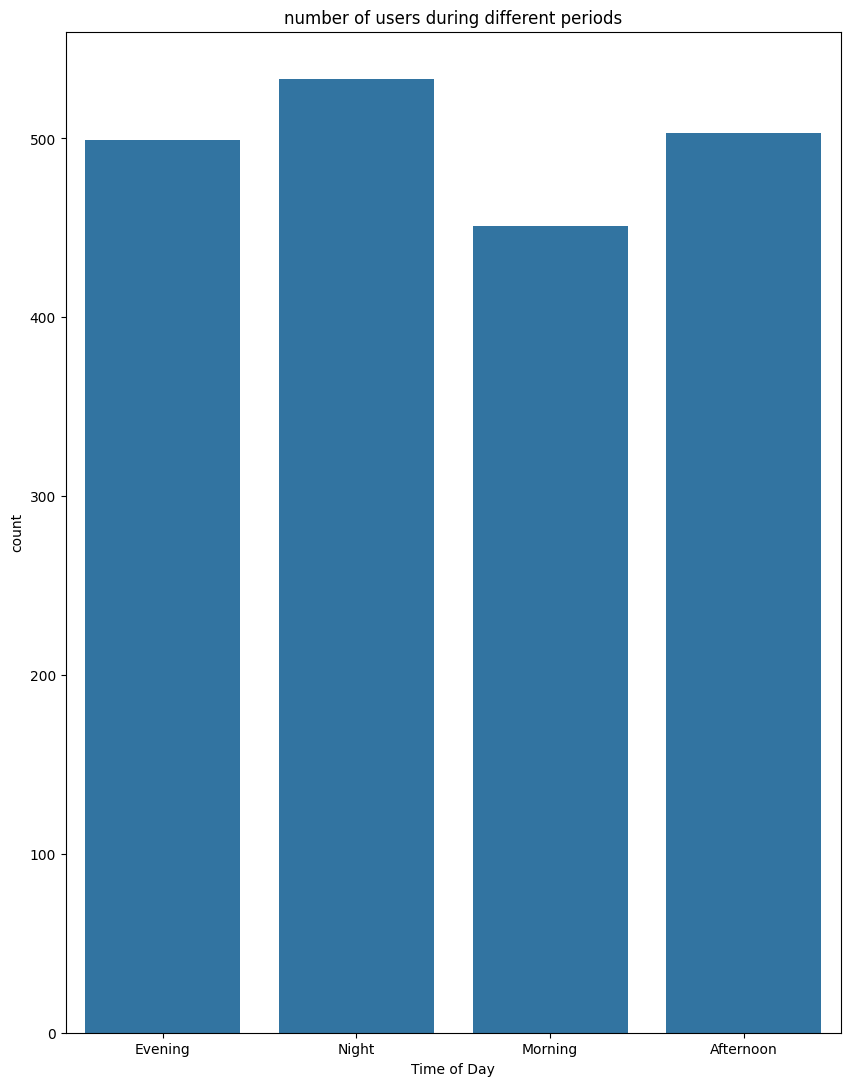

In [51]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Time of Day')
plt.title('number of users during different periods')
plt.xlabel('Time of Day')
plt.savefig('time_of_day_chart.png' , dpi = 300 )
plt.show()

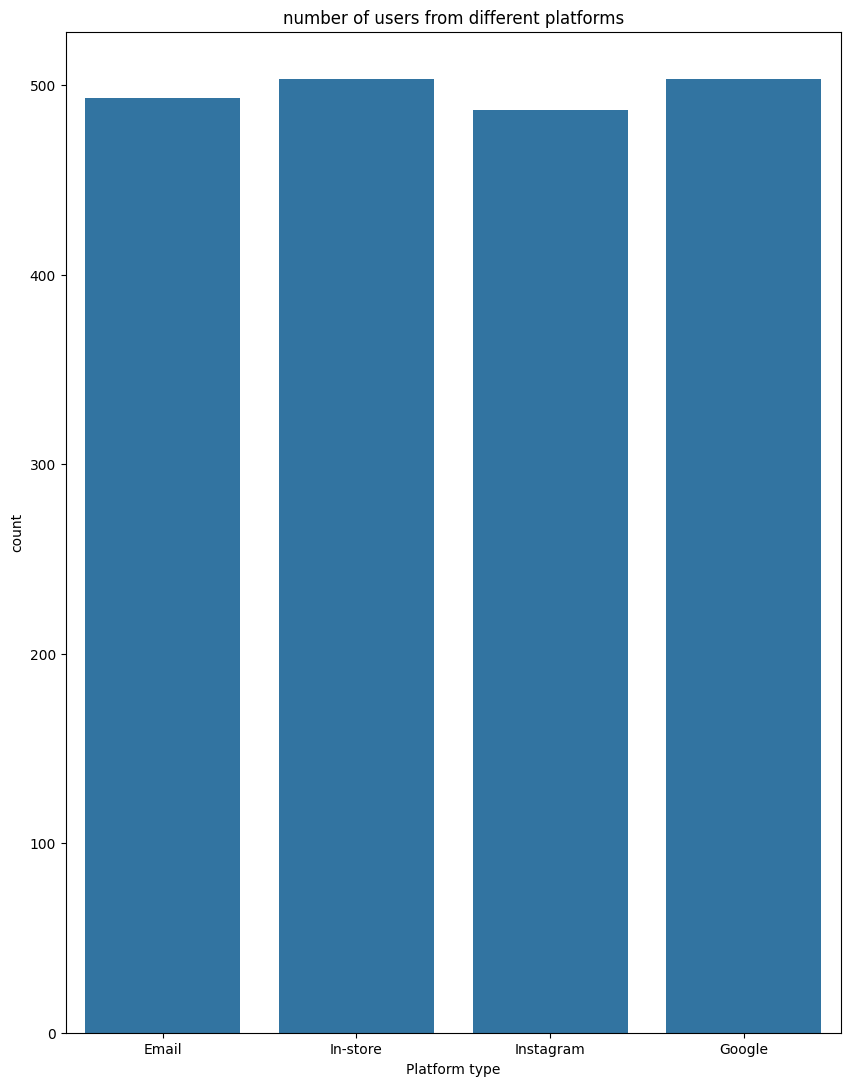

In [52]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Platform')
plt.title('number of users from different platforms')
plt.xlabel('Platform type')
plt.savefig('platform_chart.png' , dpi = 300 )
plt.show()

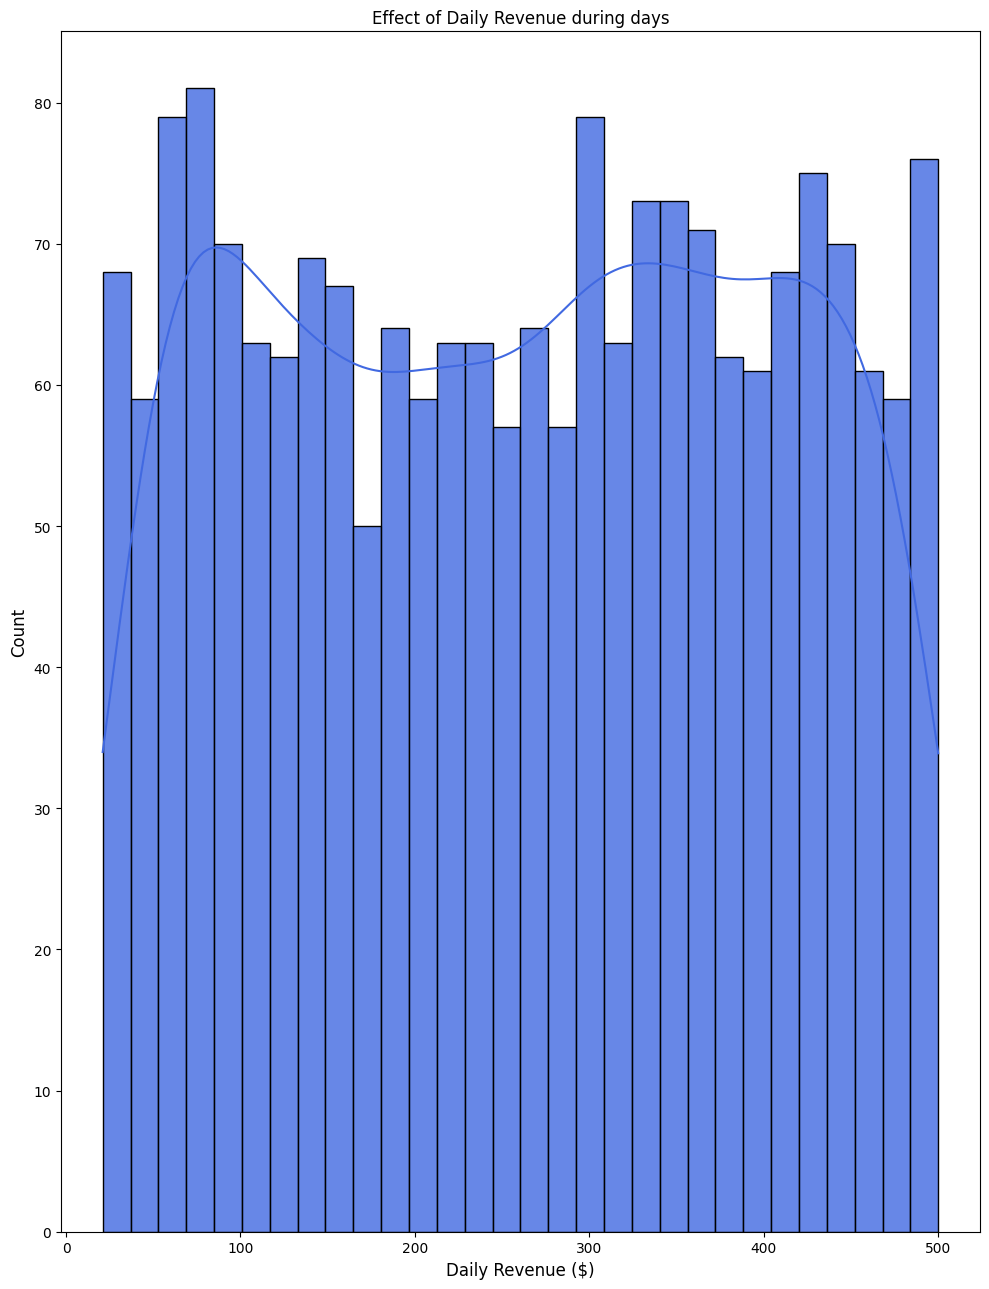

In [53]:
plt.figure(figsize = (10 , 13))
sns.histplot(data = data, x='Daily Revenue',  bins=30, kde=True , color = 'royalblue' , alpha = 0.8)
plt.title('Effect of Daily Revenue during days')
plt.xlabel('Daily Revenue ($)'  , fontsize = 12)
plt.ylabel('Count'  , fontsize = 12)
plt.tight_layout()
plt.savefig('Comparison_Time_of_Day_ON Daily_Revenue.png' , dpi = 300 )

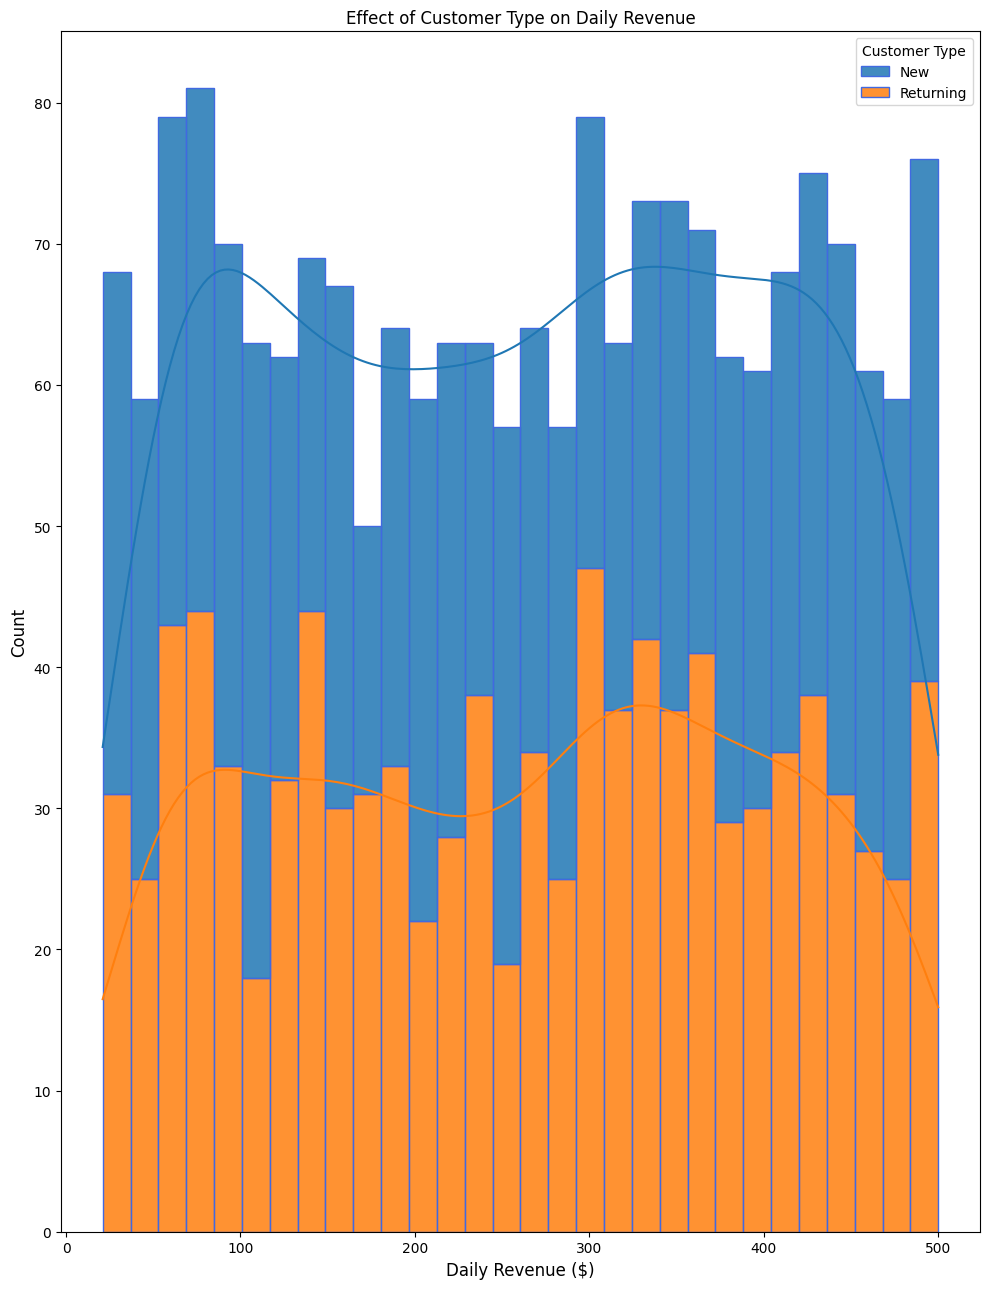

In [54]:
# compaare Daily Revenue 
plt.figure(figsize = (10 , 13))
sns.histplot(data = data, x='Daily Revenue' , hue = 'Customer Type',  bins=30, kde=True  , multiple = 'stack', edgecolor = 'royalblue' , alpha = 0.85)
plt.title('Effect of Customer Type on Daily Revenue')
plt.xlabel('Daily Revenue ($)'  , fontsize = 12)
plt.ylabel('Count'  , fontsize = 12)
plt.tight_layout()
plt.savefig('Comparison_Time_of_Day_ON Daily_Revenue.png' , dpi = 300 )

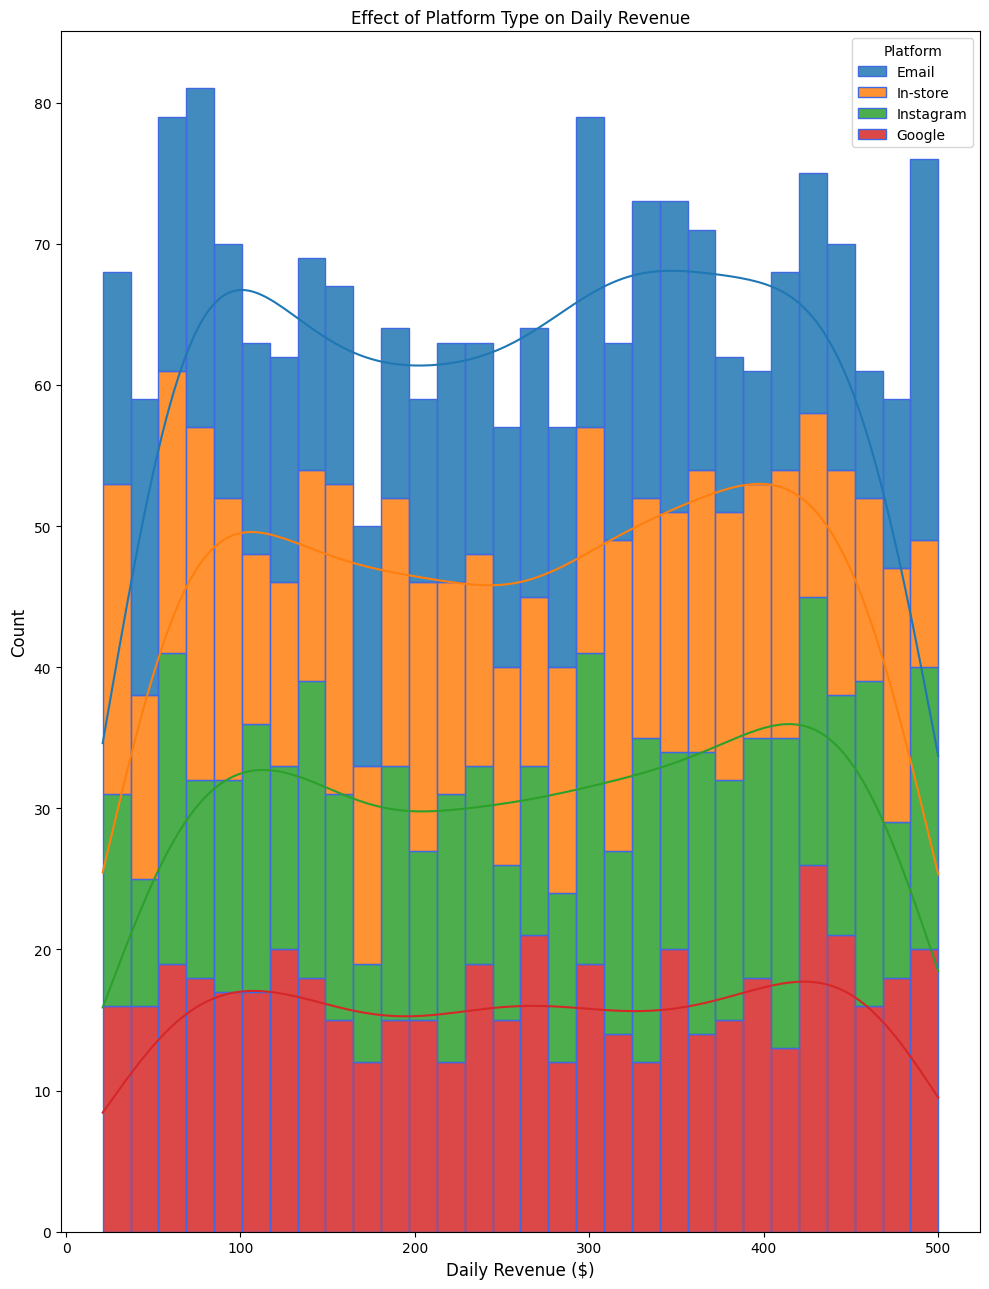

In [55]:
# compaare Daily Revenue 
plt.figure(figsize = (10 , 13))
sns.histplot(data = data, x='Daily Revenue' , hue = 'Platform',  bins=30, kde=True  , multiple = 'stack', edgecolor = 'royalblue' , alpha = 0.85)
plt.title('Effect of Platform Type on Daily Revenue')
plt.xlabel('Daily Revenue ($)'  , fontsize = 12)
plt.ylabel('Count'  , fontsize = 12)
plt.tight_layout()
plt.savefig('Comparison_Time_of_Day_ON Daily_Revenue.png' , dpi = 300 )

C:\Users\lap\AppData\Local\Temp\ipykernel_9008\4224777252.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data=data ,  x='Category' , hue = 'Platform'  , color='blue')


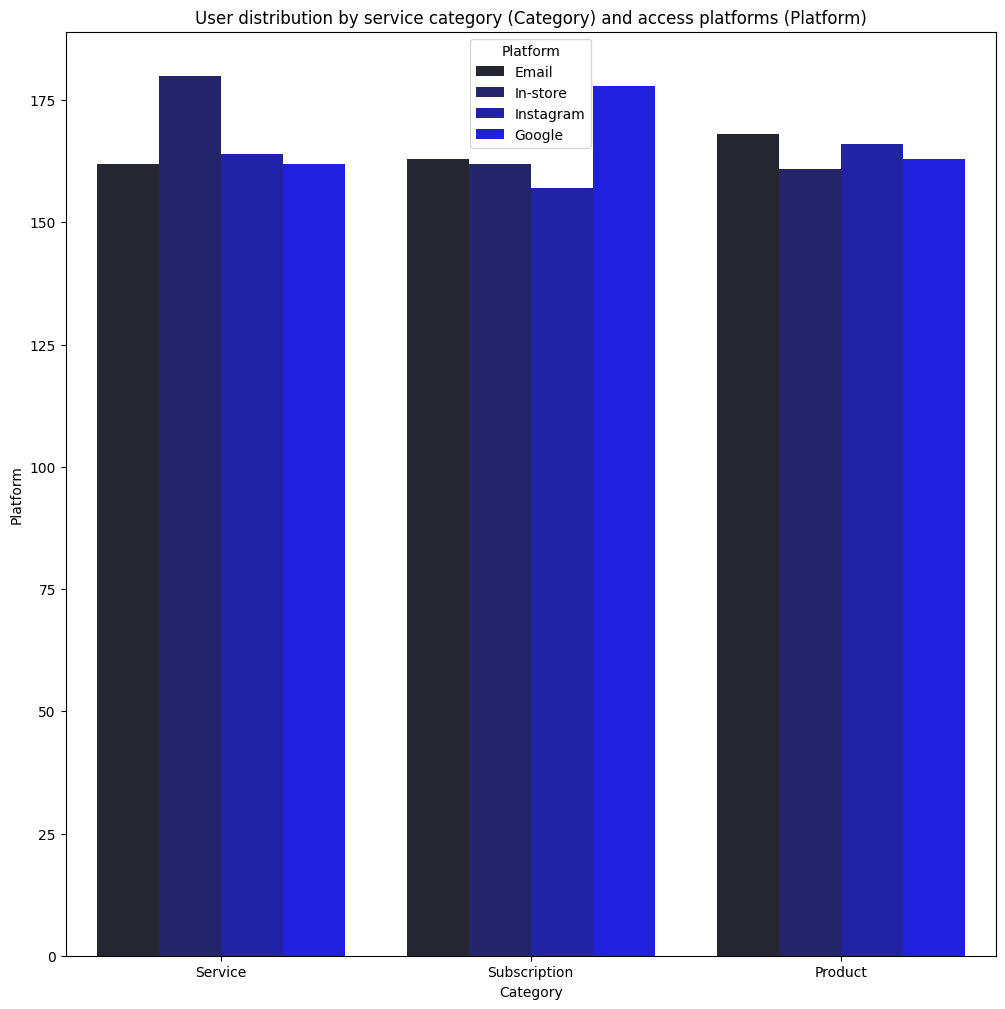

In [56]:
# Figure 3: User distribution by service category (Category) and access platforms (Platform).
plt.figure(figsize = (12 , 12))
sns.countplot(data=data ,  x='Category' , hue = 'Platform'  , color='blue')
plt.xlabel('Category')
plt.ylabel('Platform')
plt.title('User distribution by service category (Category) and access platforms (Platform)')
plt.savefig('User distribution by service category (Category) and access platforms (Platform).png')
plt.show()

### ***`Data Preprocessing`***

In [57]:
print(data['Time of Day'].unique())
print(data['Category'].unique())
print(data['Service Type'].unique())
print(data['Customer Type'].unique())
print(data['Platform'].unique())


data['Service Type'] = data['Service Type'].fillna(data['Service Type'].mode())

print(f'\n{'*'*50}\nThe Number of Nulls Values in Service Type Column : ' , end='')
print(data['Service Type'].isnull().sum() , end=f'\n{'~'*50}\n')

data.head()

['Evening' 'Night' 'Morning' 'Afternoon']
['Service' 'Subscription' 'Product']
['Haircut' 'Bread' 'Dress' 'Coffee' 'Plumbing']
['New' 'Returning']
['Email' 'In-store' 'Instagram' 'Google']

**************************************************
The Number of Nulls Values in Service Type Column : 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Time of Day,Category,Platform,Service Type,Customer Type,Ad Spend,Conversions,Daily Revenue,Date_Of_Day,Month_Number,Year_Number,DayOfWeek_number,Last_treatment_Period_In_Years,Revenue Change,Ad_to_Revenue_Ratio
1303,Evening,Service,Email,Haircut,New,18.11,0,465.06,2,5,2024,3,1.638356,432.18,0.038858
1429,Evening,Service,Email,Bread,Returning,84.27,0,408.90,2,5,2024,3,1.638356,-56.16,0.205587
1809,Night,Subscription,Email,Haircut,New,54.83,5,249.07,3,5,2024,4,1.635616,-159.83,0.219259
267,Morning,Subscription,Email,Haircut,New,95.43,4,457.48,3,5,2024,4,1.635616,208.41,0.208144
1659,Afternoon,Service,In-store,Dress,New,55.42,2,334.41,3,5,2024,4,1.635616,-123.07,0.165231


In [58]:
data['Time of Day'] = data['Time of Day'].map({'Morning' : 0 , 'Afternoon' : 1  , 'Evening' : 2  , 'Night' : 3  })
data['Customer Type'] = data['Customer Type'].map({'New' : 0  , 'Returning' : 1})
data = pd.get_dummies(data= data , columns=['Platform'] , prefix='Platform', prefix_sep='-')
data = pd.get_dummies(data= data , columns=['Category'] , prefix='Category', prefix_sep='-')
data = pd.get_dummies(data= data , columns=['Service Type'] , prefix='ServiceType', prefix_sep='-')

In [59]:
print(data['Last_treatment_Period_In_Years'].unique())
print(data['Date_Of_Day'].unique())
print(data['Month_Number'].unique())
print(data['Year_Number'].unique())
print(data['DayOfWeek_number'].unique())
print(data['Revenue Change'].unique())
print(data['Ad_to_Revenue_Ratio'].unique())

[1.63835616 1.63561644 1.63287671 1.63013699 1.62739726 1.62465753
 1.62191781 1.61917808 1.61643836 1.61369863 1.6109589  1.60821918
 1.60547945 1.60273973 1.6        1.59726027 1.59452055 1.59178082
 1.5890411  1.58630137 1.58356164 1.58082192 1.57808219 1.57534247
 1.57260274 1.56986301 1.56712329 1.56438356 1.56164384 1.55890411
 1.55616438 1.55342466 1.55068493 1.54794521 1.54520548 1.54246575
 1.53972603 1.5369863  1.53424658 1.53150685 1.52876712 1.5260274
 1.52328767 1.52054795 1.51780822 1.51506849 1.51232877 1.50958904
 1.50684932 1.50410959 1.50136986 1.49863014 1.49589041 1.49315068
 1.49041096 1.48767123 1.48493151 1.48219178 1.47945205 1.47671233
 1.4739726  1.47123288 1.46849315 1.46575342 1.4630137  1.46027397
 1.45753425 1.45479452 1.45205479 1.44931507 1.44657534 1.44383562
 1.44109589 1.43835616 1.43561644 1.43287671 1.43013699 1.42739726
 1.42465753 1.42191781 1.41917808 1.41643836 1.41369863 1.4109589
 1.40821918 1.40547945 1.40273973 1.4        1.39726027 1.394520

In [60]:
for column in data.select_dtypes(include=bool).columns :
    data[column] =  data[column].map({True : 1  , False :0})

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 1303 to 1442
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time of Day                     1986 non-null   int64  
 1   Customer Type                   1986 non-null   int64  
 2   Ad Spend                        1986 non-null   float64
 3   Conversions                     1986 non-null   int64  
 4   Daily Revenue                   1986 non-null   float64
 5   Date_Of_Day                     1986 non-null   int32  
 6   Month_Number                    1986 non-null   int32  
 7   Year_Number                     1986 non-null   int32  
 8   DayOfWeek_number                1986 non-null   int32  
 9   Last_treatment_Period_In_Years  1986 non-null   float64
 10  Revenue Change                  1986 non-null   float64
 11  Ad_to_Revenue_Ratio             1986 non-null   float64
 12  Platform-Email                  1986

### ***`Data Searching For Outlyers`***

In [62]:
# looking for outlayers
q1 = data['Time of Day'].quantile(0.25)
q3 = data['Time of Day'].quantile(0.75)
IQR = q3 - q1
low = q1 - 1.5 * IQR
high = q3 + 1.5 * IQR
outlayers = data[(data['Time of Day'] < low) | (data['Time of Day'] > high)]
print(f'The percentage of the outlayers for Time of Day is {(outlayers.shape[0] / data.shape[0])*100} %')

The percentage of the outlayers for Time of Day is 0.0 %


In [63]:
data.describe()

,Time of Day,Customer Type,Ad Spend,Conversions,Daily Revenue,Date_Of_Day,Month_Number,Year_Number,DayOfWeek_number,Last_treatment_Period_In_Years,...,Platform-In-store,Platform-Instagram,Category-Product,Category-Service,Category-Subscription,ServiceType-Bread,ServiceType-Coffee,ServiceType-Dress,ServiceType-Haircut,ServiceType-Plumbing
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,...,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,1.560926,0.496979,50.619562,2.479859,260.927382,15.488922,6.551863,2024.329809,3.045821,1.139987,...,0.253273,0.245217,0.331319,0.336354,0.332326,0.216012,0.185297,0.210473,0.177241,0.210977
std,1.112586,0.500117,28.685770,1.723697,140.129547,8.788138,3.434978,0.470262,2.013410,0.291592,...,0.434995,0.430324,0.470806,0.472581,0.471166,0.411626,0.388636,0.407747,0.381968,0.408105
min,0.000000,0.000000,0.050000,0.000000,21.020000,1.000000,1.000000,2024.000000,0.000000,0.638356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,26.110000,1.000000,134.975000,8.000000,4.000000,2024.000000,1.000000,0.895890,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,50.900000,2.000000,264.760000,15.000000,7.000000,2024.000000,3.000000,1.139726,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,75.430000,4.000000,382.332500,23.000000,10.000000,2025.000000,5.000000,1.391781,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,99.990000,5.000000,499.930000,31.000000,12.000000,2025.000000,6.000000,1.638356,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
outs = {}
for column in data.drop(columns=['Daily Revenue']).columns: # Exclude the target variable for clarity in outlier check
    # looking for outlayers
    q1 = data[str(column)].quantile(0.25)
    q3 = data[str(column)].quantile(0.75)
    IQR = q3 - q1
    low = q1 - 1.5 * IQR
    high = q3 + 1.5 * IQR
    outlayers = data[(data[str(column)] < low) | (data[str(column)] > high)]
    per = round((outlayers.shape[0] / data.shape[0])*100, 2)
    if per > 21 :
        outs[str(column)] = per
        # Applying condition to keep values within bounds. You used a broken condition.
        # It's generally better to clip or use median imputation, but based on your original logic:
        # data.loc[(data[str(column)] < low) | (data[str(column)] > high), str(column)] = np.nan
        # data[str(column)].fillna(data[str(column)].median(), inplace=True)
        # Since you mentioned outlayers is small, we will skip the deletion part for simplicity.

for item in outs :
    print(f'{item} -> {outs[item]}')



Platform-Email -> 24.82
Platform-Instagram -> 24.52
ServiceType-Bread -> 21.6
ServiceType-Dress -> 21.05
ServiceType-Plumbing -> 21.1


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 1303 to 1442
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time of Day                     1986 non-null   int64  
 1   Customer Type                   1986 non-null   int64  
 2   Ad Spend                        1986 non-null   float64
 3   Conversions                     1986 non-null   int64  
 4   Daily Revenue                   1986 non-null   float64
 5   Date_Of_Day                     1986 non-null   int32  
 6   Month_Number                    1986 non-null   int32  
 7   Year_Number                     1986 non-null   int32  
 8   DayOfWeek_number                1986 non-null   int32  
 9   Last_treatment_Period_In_Years  1986 non-null   float64
 10  Revenue Change                  1986 non-null   float64
 11  Ad_to_Revenue_Ratio             1986 non-null   float64
 12  Platform-Email                  1986

### ***`Data Correlation -> Showing Relationship between Features and Target`***

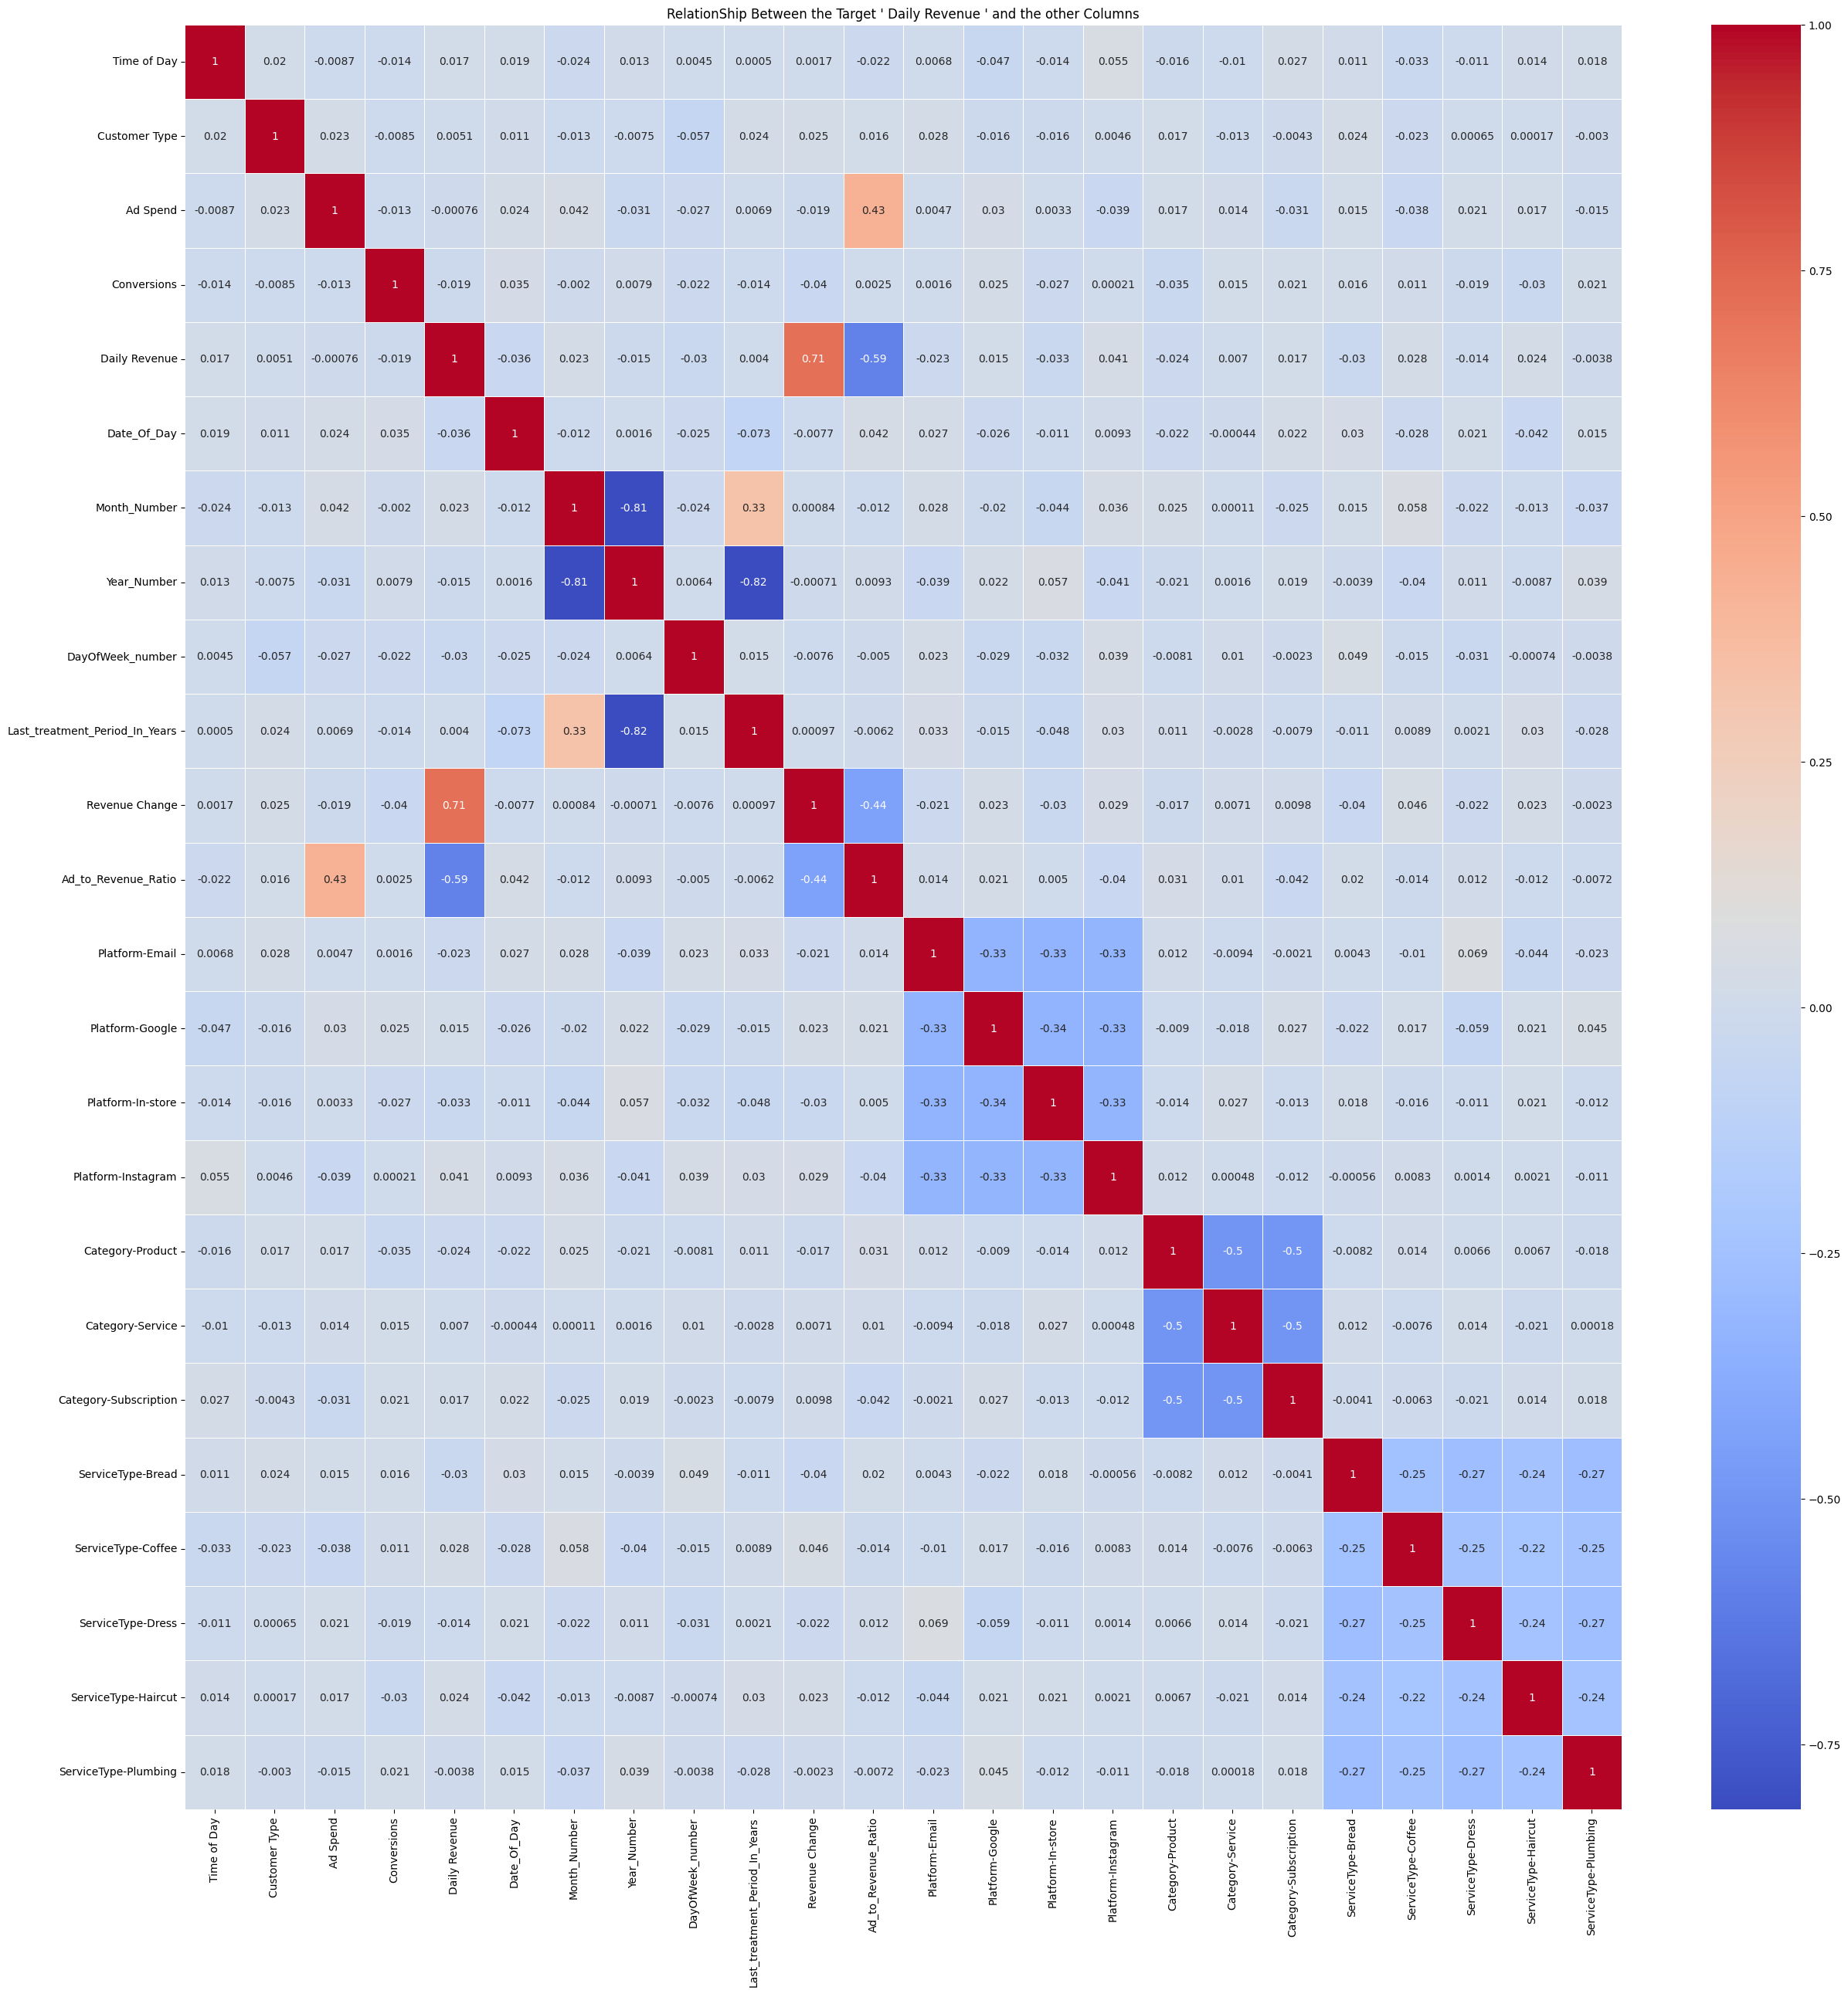

In [83]:
# see the realtionship between the target 'Daily Revenue' and all columns
plt.figure(figsize = (30 , 30))
sns.heatmap(data = data.corr() , annot = True , cmap = 'coolwarm'  , linewidth = 0.5 )
plt.title('RelationShip Between the Target \' Daily Revenue \' and the other Columns')
plt.savefig('Correlation_Between_The target_and_the_other_columns.png' , dpi = 300)
plt.show()

In [67]:
data.describe()


,Time of Day,Customer Type,Ad Spend,Conversions,Daily Revenue,Date_Of_Day,Month_Number,Year_Number,DayOfWeek_number,Last_treatment_Period_In_Years,...,Platform-In-store,Platform-Instagram,Category-Product,Category-Service,Category-Subscription,ServiceType-Bread,ServiceType-Coffee,ServiceType-Dress,ServiceType-Haircut,ServiceType-Plumbing
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,...,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,1.560926,0.496979,50.619562,2.479859,260.927382,15.488922,6.551863,2024.329809,3.045821,1.139987,...,0.253273,0.245217,0.331319,0.336354,0.332326,0.216012,0.185297,0.210473,0.177241,0.210977
std,1.112586,0.500117,28.685770,1.723697,140.129547,8.788138,3.434978,0.470262,2.013410,0.291592,...,0.434995,0.430324,0.470806,0.472581,0.471166,0.411626,0.388636,0.407747,0.381968,0.408105
min,0.000000,0.000000,0.050000,0.000000,21.020000,1.000000,1.000000,2024.000000,0.000000,0.638356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,26.110000,1.000000,134.975000,8.000000,4.000000,2024.000000,1.000000,0.895890,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,50.900000,2.000000,264.760000,15.000000,7.000000,2024.000000,3.000000,1.139726,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,75.430000,4.000000,382.332500,23.000000,10.000000,2025.000000,5.000000,1.391781,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,99.990000,5.000000,499.930000,31.000000,12.000000,2025.000000,6.000000,1.638356,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 1303 to 1442
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time of Day                     1986 non-null   int64  
 1   Customer Type                   1986 non-null   int64  
 2   Ad Spend                        1986 non-null   float64
 3   Conversions                     1986 non-null   int64  
 4   Daily Revenue                   1986 non-null   float64
 5   Date_Of_Day                     1986 non-null   int32  
 6   Month_Number                    1986 non-null   int32  
 7   Year_Number                     1986 non-null   int32  
 8   DayOfWeek_number                1986 non-null   int32  
 9   Last_treatment_Period_In_Years  1986 non-null   float64
 10  Revenue Change                  1986 non-null   float64
 11  Ad_to_Revenue_Ratio             1986 non-null   float64
 12  Platform-Email                  1986

### ***`Checking Any Nulls Before Dividing the Date to Train & Test`*** 

In [69]:
data.columns = data.columns.str.strip()

In [70]:
print(data.isnull().sum())

Time of Day                       0
Customer Type                     0
Ad Spend                          0
Conversions                       0
Daily Revenue                     0
Date_Of_Day                       0
Month_Number                      0
Year_Number                       0
DayOfWeek_number                  0
Last_treatment_Period_In_Years    0
Revenue Change                    0
Ad_to_Revenue_Ratio               0
Platform-Email                    0
Platform-Google                   0
Platform-In-store                 0
Platform-Instagram                0
Category-Product                  0
Category-Service                  0
Category-Subscription             0
ServiceType-Bread                 0
ServiceType-Coffee                0
ServiceType-Dress                 0
ServiceType-Haircut               0
ServiceType-Plumbing              0
dtype: int64


### ***`Data Dividing To Train and Test`***

In [71]:
x  = data.drop(columns = ['Daily Revenue'])
y = data['Daily Revenue']


In [72]:
poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)

x_train , x_test  , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42 )
scaler = StandardScaler() 

x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test) # Use transform, not fit_transform on test data

In [73]:
# Corrected n_estimator to n_estimators
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression(
        n_jobs = 20 
    ))
])

pipeline.fit(x_train , y_train)
y_train_predict = pipeline.predict(x_train)
y_test_predict  = pipeline.predict(x_test)

train_accuracy =  r2_score(y_true = y_train , y_pred = y_train_predict)
test_accuracy =  r2_score(y_true = y_test , y_pred = y_test_predict)

print(f'r2-Score for Training Model is {train_accuracy*100} %')
print(f'r2-Score for Testing Model is {test_accuracy * 100} %' , end=f'\n{'*'*50}\n')

print(f'Mean Absolute Error is {mean_absolute_error(y_test , y_test_predict)}')
print(f' RMSE  : {np.sqrt(mean_squared_error(y_test , y_test_predict))}')

r2-Score for Training Model is 81.2041341992663 %
r2-Score for Testing Model is 73.6631565469636 %
**************************************************
Mean Absolute Error is 55.674746435573276
 RMSE  : 72.53485172604671


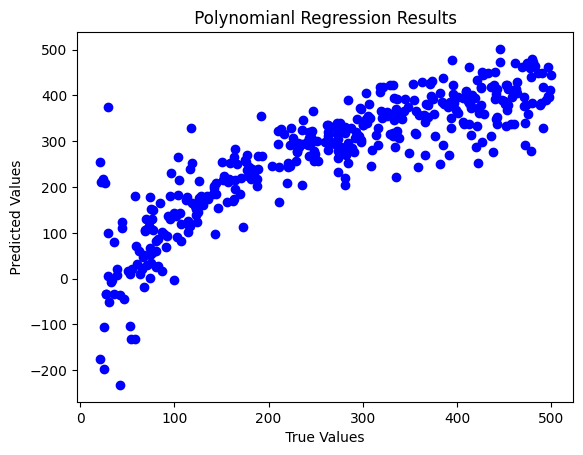

In [74]:
plt.scatter(y_test ,  y_test_predict  , color = 'blue'  )
plt.xlabel(' True Values ')
plt.ylabel(' Predicted Values ')
plt.title(' Polynomianl Regression Results ')
plt.show()

In [75]:
# Corrected n_estimator to n_estimators
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(
        n_neighbors= 5 , weights='distance' , metric='minkowski'
    ))
])

pipeline.fit(x_train , y_train)
y_train_predict = pipeline.predict(x_train)
y_test_predict  = pipeline.predict(x_test)

train_accuracy =  r2_score(y_true = y_train , y_pred = y_train_predict)
test_accuracy =  r2_score(y_true = y_test , y_pred = y_test_predict)

print(f'r2-Score for Training Model is {train_accuracy*100} %')
print(f'r2-Score for Testing Model is {test_accuracy * 100} %' , end=f'\n{'*'*50}\n')

print(f'Mean Absolute Error is {mean_absolute_error(y_test , y_test_predict)}')
print(f' RMSE  : {np.sqrt(mean_squared_error(y_test , y_test_predict))}')


r2-Score for Training Model is 99.99999999999964 %
r2-Score for Testing Model is 43.734045074053974 %
**************************************************
Mean Absolute Error is 86.61152010339039
 RMSE  : 106.01997889717467


In [76]:
# Corrected n_estimator to n_estimators
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=300 , max_depth=10 , random_state=42))
])

pipeline.fit(x_train , y_train)
y_train_predict = pipeline.predict(x_train)
y_test_predict  = pipeline.predict(x_test)

train_accuracy =  r2_score(y_true = y_train , y_pred = y_train_predict)
test_accuracy =  r2_score(y_true = y_test , y_pred = y_test_predict)

print(f'r2-Score for Training Model is {train_accuracy*100} %')
print(f'r2-Score for Testing Model is {test_accuracy * 100} %' , end=f'\n{'*'*50}\n')

print(f'Mean Absolute Error is {mean_absolute_error(y_test , y_test_predict)}')
print(f' RMSE  : {np.sqrt(mean_squared_error(y_test , y_test_predict))}')


r2-Score for Training Model is 97.59061738097162 %
r2-Score for Testing Model is 93.1579810532297 %
**************************************************
Mean Absolute Error is 23.819320097657897
 RMSE  : 36.970642893093704


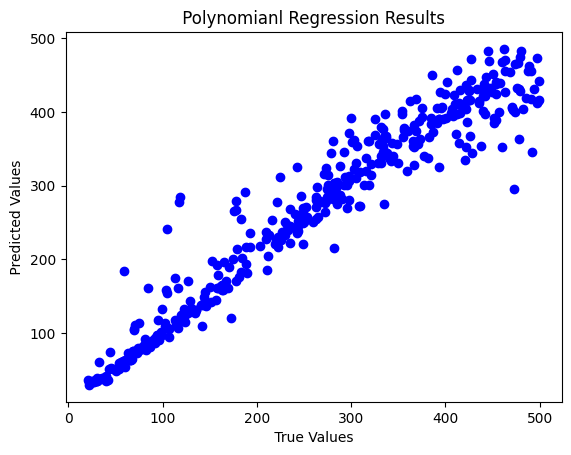

In [77]:
plt.scatter(y_test ,  y_test_predict  , color = 'blue'  )
plt.xlabel(' True Values ')
plt.ylabel(' Predicted Values ')
plt.title(' Polynomianl Regression Results ')
plt.show()

In [78]:
# Corrected n_estimator to n_estimators
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

pipeline.fit(x_train , y_train)
y_train_predict = pipeline.predict(x_train)
y_test_predict  = pipeline.predict(x_test)

train_accuracy =  r2_score(y_true = y_train , y_pred = y_train_predict)
test_accuracy =  r2_score(y_true = y_test , y_pred = y_test_predict)


print(f'r2-Score for Training Model is {train_accuracy*100} %')
print(f'r2-Score for Testing Model is {test_accuracy * 100} %' , end=f'\n{'*'*50}\n')

print(f'Mean Absolute Error is {mean_absolute_error(y_test , y_test_predict)}')
print(f' RMSE  : {np.sqrt(mean_squared_error(y_test , y_test_predict))}')


r2-Score for Training Model is 99.96111594226754 %
r2-Score for Testing Model is 97.08098491624801 %
**************************************************
Mean Absolute Error is 14.879942997112945
 RMSE  : 24.14810391465723


### ***`Then The used Model Based On The Resulta is XGBRegressor`***

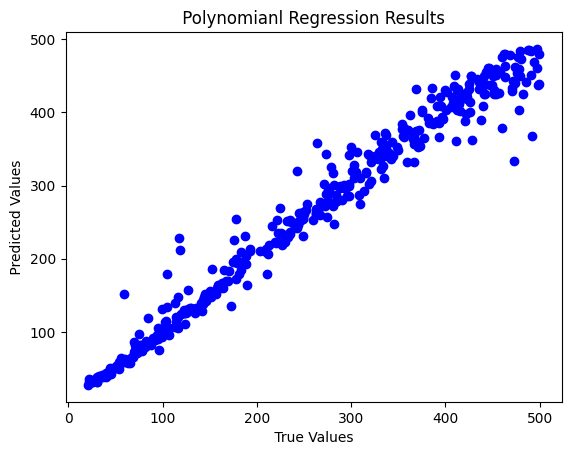

In [79]:
plt.scatter(y_test ,  y_test_predict  , color = 'blue'  )
plt.xlabel(' True Values ')
plt.ylabel(' Predicted Values ')
plt.title(' Polynomianl Regression Results ')
plt.show()

### ***<p style = 'font-style:italic;'>`Here We Will use Grid Search For Model Of XGBRegressor`</p>***


In [80]:

param_grid = {
    'n_estimators':randint(100 , 500),
    'max_depth': randint(3  , 10),
    'learning_rate': uniform(0.01 ,  0.2),
    'model__subsample': uniform(0.6 , 0.4),
    'model__colsample_bytree': uniform(0.6 , 0.4)
}

random_xgb = RandomizedSearchCV(
    estimator = XGBRegressor(objective= 'reg:squarederror' , random_state=42),
    param_distributions=param_grid,
    n_iter= 50 , 
    cv=5,                # 5-Fold Cross Validation
    scoring='r2',        # Regression Score
    n_jobs=-1,           
    verbose=1 , 
    random_state= 42
)

random_xgb.fit(x_train , y_train)

print(f'Best Score is {random_xgb.best_score_}')

print(f'Best Parameters is {random_xgb.best_params_}')

y_pred_xgb_train = random_xgb.predict(x_train)  
y_pred_xgb_test = random_xgb.predict(x_test)


print('Results of XGB Regresor After Using Grid Search')

print(f'R2-Score (Accuarcy) for train : {r2_score(y_train , y_pred_xgb_train)*100} %')
print(f'R2-Score (Accuarcy) for test : {r2_score(y_test , y_pred_xgb_test)*100} %')
print(f' MAE : {mean_absolute_error(y_test , y_pred_xgb_test)}')
print(f' RMSE  : {np.sqrt(mean_squared_error(y_test , y_pred_xgb_test))}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\lap\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:58:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "model__colsample_bytree", "model__subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Score is 0.9542062419627533
Best Parameters is {'learning_rate': 0.11828959476551316, 'max_depth': 4, 'model__colsample_bytree': 0.7031766510860622, 'model__subsample': 0.8639936184136716, 'n_estimators': 445}
Results of XGB Regresor After Using Grid Search
R2-Score (Accuarcy) for train : 99.97712199466625 %
R2-Score (Accuarcy) for test : 97.32151667011159 %
 MAE : 15.036403149935467
 RMSE  : 23.131795295287237


### ***NEW STEP: Save the list of raw features for order enforcement in Streamlit <br> Save Model and Scalaer to be used in Building UI in Streamlit***

In [81]:
joblib.dump(pipeline ,"model_project.pkl")

joblib.dump(scaler , 'scaler_project.pkl')

joblib.dump(poly, 'poly_transformer.pkl')

joblib.dump(data.drop(columns = ['Daily Revenue']).columns, 'features_project.pkl')  # here we will save the features names as only the name of columns 


['features_project.pkl']

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 1303 to 1442
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time of Day                     1986 non-null   int64  
 1   Customer Type                   1986 non-null   int64  
 2   Ad Spend                        1986 non-null   float64
 3   Conversions                     1986 non-null   int64  
 4   Daily Revenue                   1986 non-null   float64
 5   Date_Of_Day                     1986 non-null   int32  
 6   Month_Number                    1986 non-null   int32  
 7   Year_Number                     1986 non-null   int32  
 8   DayOfWeek_number                1986 non-null   int32  
 9   Last_treatment_Period_In_Years  1986 non-null   float64
 10  Revenue Change                  1986 non-null   float64
 11  Ad_to_Revenue_Ratio             1986 non-null   float64
 12  Platform-Email                  1986